<a href="https://colab.research.google.com/github/Ashikgurung61/Machine-Learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict the best fit line for Covid-19 patients and the available to beds state wise.



In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/content/worldometer_data.csv")
data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,208.0,3.041549e+07,1.047661e+08,801.00,966314.00,7041972.5,25756135.50,1.381345e+09
TotalCases,209.0,9.171850e+04,4.325867e+05,10.00,712.00,4491.0,36896.00,5.032179e+06
NewCases,4.0,1.980500e+03,3.129611e+03,20.00,27.50,656.0,2609.00,6.590000e+03
TotalDeaths,188.0,3.792590e+03,1.548718e+04,1.00,22.00,113.0,786.00,1.628040e+05
NewDeaths,3.0,3.000000e+02,4.511995e+02,1.00,40.50,80.0,449.50,8.190000e+02
TotalRecovered,205.0,5.887898e+04,2.566984e+05,7.00,334.00,2178.0,20553.00,2.576668e+06
NewRecovered,3.0,1.706000e+03,2.154780e+03,42.00,489.00,936.0,2538.00,4.140000e+03
ActiveCases,205.0,2.766433e+04,1.746327e+05,0.00,86.00,899.0,7124.00,2.292707e+06
"Serious,Critical",122.0,5.343934e+02,2.047519e+03,1.00,3.25,27.5,160.25,1.829600e+04
Tot Cases/1M pop,208.0,3.196024e+03,5.191986e+03,3.00,282.00,1015.0,3841.75,3.992200e+04


In [5]:
data.isna().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [6]:
data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [7]:
attribute = ['Population','TotalDeaths','TotalRecovered','TotalDeaths',
             'ActiveCases','Serious,Critical','Deaths/1M pop','TotalTests',
             'Tests/1M pop','Tot Cases/1M pop']

In [8]:
data.drop(columns=['NewCases','NewDeaths','NewRecovered','WHO Region'], axis = 0, inplace = True)

In [9]:
for i in attribute:
  data[i].fillna(data[i].mean(), inplace = True)

In [10]:
data.isna().sum()

Country/Region      0
Continent           1
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
dtype: int64

In [11]:
data.head(1)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,USA,North America,331198130.0,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0


In [12]:
data.nunique()

Country/Region      209
Continent             6
Population          209
TotalCases          206
TotalDeaths         151
TotalRecovered      202
ActiveCases         181
Serious,Critical     75
Tot Cases/1M pop    203
Deaths/1M pop       108
TotalTests          191
Tests/1M pop        191
dtype: int64

In [13]:
data.size

2508

In [14]:
data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases',
       'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop'],
      dtype='object')

In [15]:
x = data.drop(columns = ['Country/Region', 'Continent','TotalDeaths'], axis = 1, inplace = False)
y = data['TotalDeaths']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [36]:
x_train

,Population,TotalCases,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
150,2.422754e+06,935,136.0,783.0,534.393443,386.000000,7.000000,5.183000e+03,2139.000000
96,4.102577e+06,5404,4688.0,561.0,7.000000,1317.000000,38.000000,1.253170e+05,30546.000000
199,2.857690e+05,22,22.0,0.0,534.393443,77.000000,98.681176,1.109900e+04,38839.000000
68,6.489514e+06,19126,9236.0,9377.0,509.000000,2947.000000,79.000000,2.512710e+05,38720.000000
156,3.041549e+07,712,651.0,48.0,4.000000,3196.024038,98.681176,1.402405e+06,83959.366492
...,...,...,...,...,...,...,...,...,...
106,6.632263e+06,3902,2913.0,866.0,534.393443,588.000000,19.000000,1.402405e+06,83959.366492
14,1.648514e+08,249651,143824.0,102521.0,534.393443,1514.000000,20.000000,1.225124e+06,7432.000000
92,4.660728e+06,6444,5291.0,996.0,3.000000,1383.000000,34.000000,5.738700e+04,12313.000000
179,4.292400e+04,160,64.0,80.0,3.000000,3728.000000,373.000000,1.115000e+03,25976.000000


In [37]:
y_train

150      16.000000
96      155.000000
199    3792.590426
68      513.000000
156      13.000000
          ...     
106     123.000000
14     3306.000000
92      157.000000
179      16.000000
102      59.000000
Name: TotalDeaths, Length: 167, dtype: float64

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [46]:
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)


In [42]:
data['TotalDeaths']

0      162804.000000
1       98644.000000
2       41638.000000
3       14606.000000
4        9604.000000
           ...      
204         1.000000
205      3792.590426
206      3792.590426
207      3792.590426
208         1.000000
Name: TotalDeaths, Length: 209, dtype: float64

In [29]:
data['Population'].max()

1381344997.0

In [30]:
y_train

159       47.0
105       84.0
176        1.0
75       384.0
87        49.0
        ...   
113       55.0
64       719.0
15     35187.0
125        5.0
9      28500.0
Name: TotalDeaths, Length: 167, dtype: float64

<ipython-input-48-7513656e2a95>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],'k--', color = 'k', label = "Prediction")


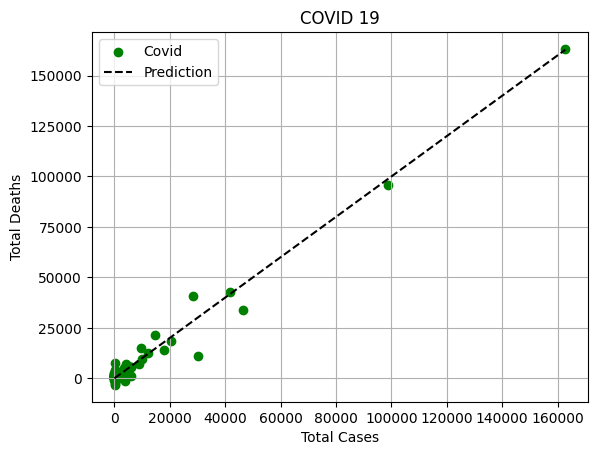

In [48]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_train_pred, label = "Covid", color='g')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],'k--', color = 'k', label = "Prediction")
plt.title("COVID 19")
plt.ylabel("Total Deaths")
plt.xlabel("Total Cases")
plt.legend()
plt.grid()
plt.show()

<ipython-input-49-fe67478614ba>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', color = 'k', label = "Prediction")


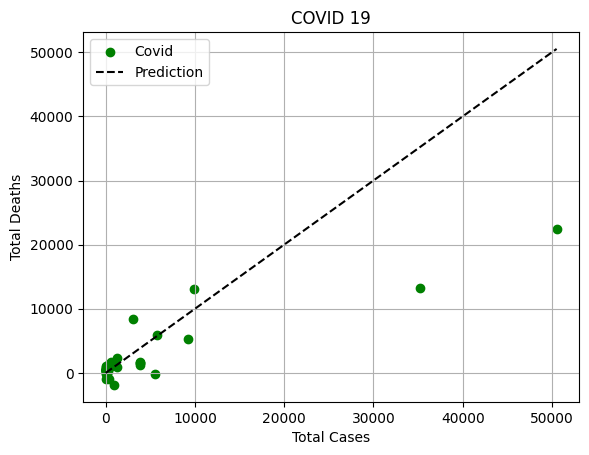

In [49]:
plt.scatter(y_test, y_test_pred, label = "Covid", color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', color = 'k', label = "Prediction")
plt.title("COVID 19")
plt.ylabel("Total Deaths")
plt.xlabel("Total Cases")
plt.legend()
plt.grid()
plt.show()